## Author: Rajesh Kumar Singh


# Project: – KNearest Neighbor (KNN)

#### Data Description:

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Domain: Banking

#### Context:

This case is about a bank (Thera Bank)whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

#### Attribute Information:
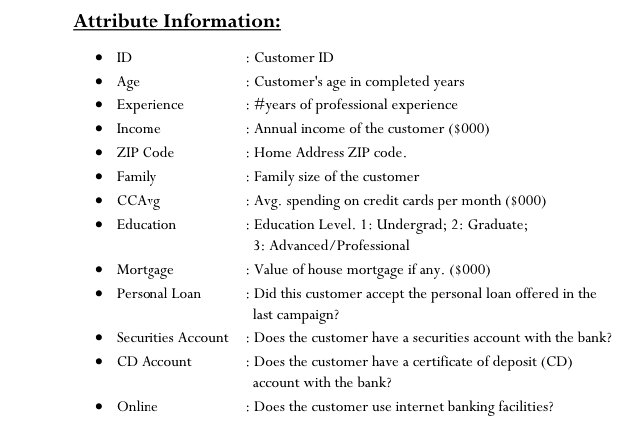

#### Learning Outcomes:

1. Exploratory Data Analysis
2. Preparing the data to train a model
3. Training and making predictions using a classification model
4. Model evaluation

#### Steps and tasks:

1. Read the column description and ensure you understand each attribute well.
2. Study the data distribution in each attribute, share your findings (15 marks)
3. Get the target column distribution. Your comments (5 marks)
4. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans (15 marks)
6. Print the confusion matrix for all the above models (5 marks)
7. Give your reasoning on which is the best model in this case and why it performs better? (5marks)

#### Dataset "Bank_Personal_Loan_Modelling"


### Project Execution Details


#### Importing necessary libraries for this modeling

In [103]:
#1. Importing the necessary libraries to do the above project

import numpy as np         #----is a library to do mathematical calculation
import pandas as pd        #----is a library to import and manage dataset
import seaborn as sns      #----is a library for making statistical graphics on top of matplotlib. 
from matplotlib import pyplot as plt  #-----is a library to plot nice chart

# Enable inline plotting
%matplotlib inline         
sns.set(style="ticks")

import warnings;

from sklearn.model_selection import train_test_split   #Import library for spliting the data
from sklearn.linear_model import LogisticRegression    #Importing Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, classification_report, roc_curve, auc

from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer

from scipy import stats
from scipy.stats import zscore
##-----------------------------------------------------------------------
warnings.filterwarnings('ignore')

#### Load Data

In [104]:
#2. Importing the dataset
ds_location = r'C:\Users\eyacdel\Documents\Total DataScience\KNearest Neighbor\Bank_Personal_Loan_Modelling.csv'

#Loading and Reading the dataset as dataframe
ds = pd.read_csv(ds_location)
ds.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [105]:
ds.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


#### Perform basic EDA on dataset

In [106]:
#The shape of the data
ds.shape

(5000, 14)

In [107]:
#The data type of each attribute
ds.dtypes

ID                     int64
Age                    int64
Experience             int64
Income                 int64
ZIPCode                int64
Family                 int64
CCAvg                float64
Education              int64
Mortgage               int64
PersonalLoan           int64
SecuritiesAccount      int64
CDAccount              int64
Online                 int64
CreditCard             int64
dtype: object

In [108]:
#Checking the presence of missing values
ds.isnull().sum()

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [109]:
#Duplicate data check
ds = ds.drop_duplicates()
ds.shape

(5000, 14)

In [110]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Initial observation on given data

Based on initial data observation, Min of "Experience" cloumn is showing negative value, so might be there could be data quality issue. Also, some values in "ZIPCode" column seems not correct. Data cleansing is required.

### Visual Data Analysis

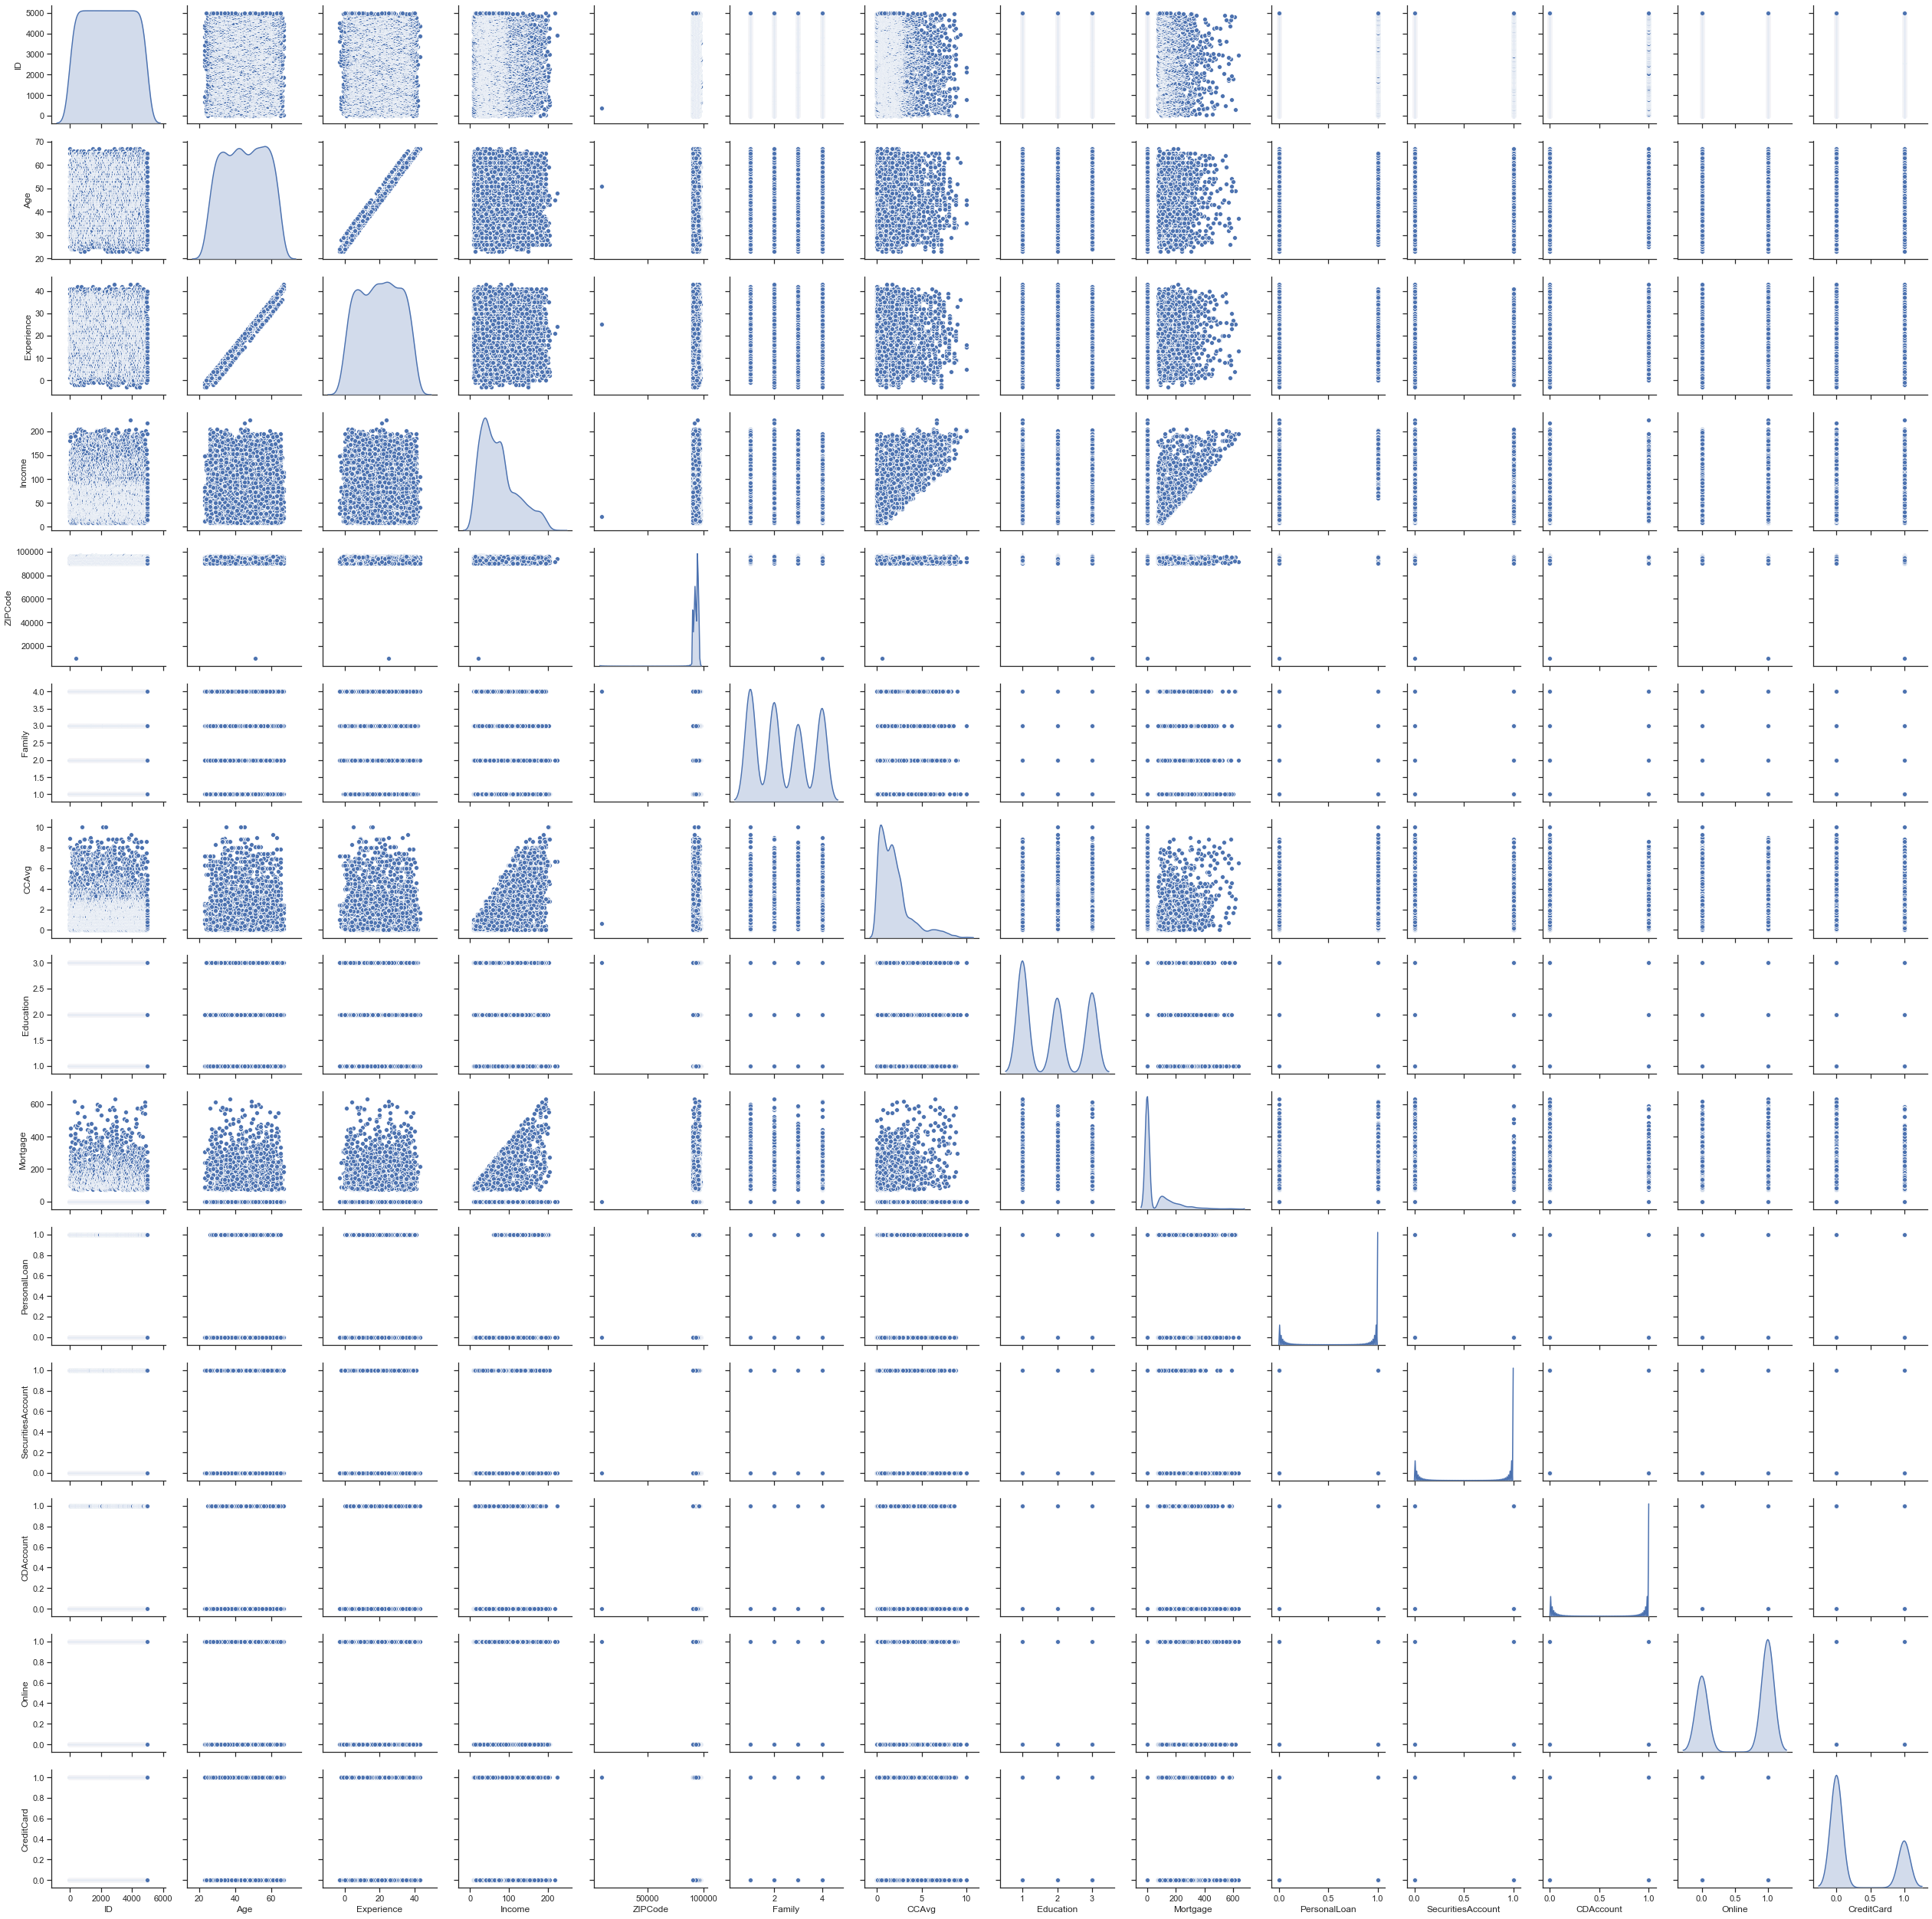

In [111]:
sns.pairplot(ds, diag_kind ='kde')

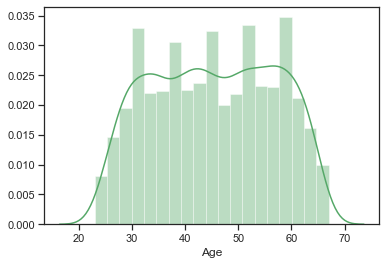

In [112]:
sns.distplot( ds['Age'], color = 'g')

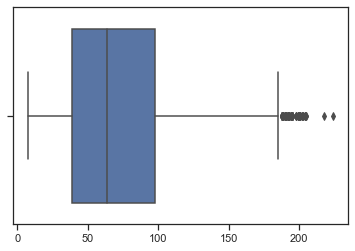

In [113]:
plt = sns.boxplot(ds[['Income']])

#### Observation
Most of the customers age fall in the age range of 30 to 60 yrs and their experience falls in the range of 5 to 35 years and most earn an income between 10K to 100K.

#### Checking the influence of Income levels and education levels on whether a customer can takes a personal loan

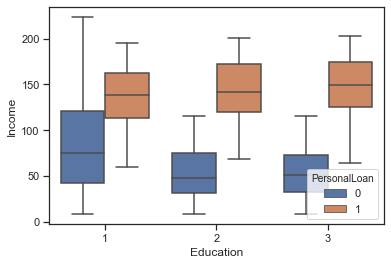

In [114]:
sns.boxplot(x="Education", y="Income", hue="PersonalLoan", data=ds)

#### Observation
The box plots show that those with education level 1 have higher incomes. But customers who go for personal loans have the same income distribution regardless of the education level.

#### Checking the influence of Mortgage and education levels on whether a customer can takes a personal loan

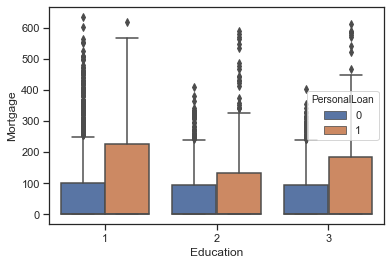

In [115]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=ds)

#### Observation
Customers who taken loan also have higher mortgages.

#### Checking top 5 locations who applied personal loan

In [116]:
zip = ds[ds.PersonalLoan==1]['ZIPCode'].value_counts().head(5)
zip

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIPCode, dtype: int64

#### Observation
Top 5 locations who applied personal loan before

#### Checking family size having any influence on taking personal loan

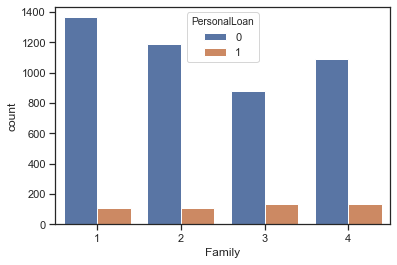

In [117]:
sns.countplot(x="Family", data=ds,hue="PersonalLoan")

#### Observation
Family size seems to have no impact on decision to take a loan.

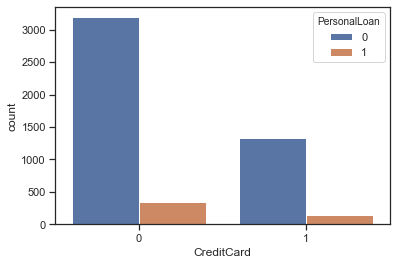

In [118]:
sns.countplot(x="CreditCard", data=ds,hue="PersonalLoan")

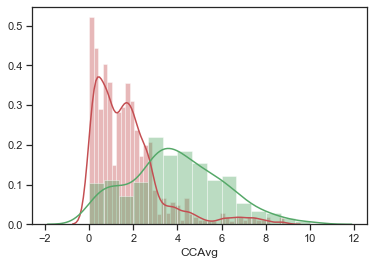

In [119]:
sns.distplot( ds[ds.PersonalLoan == 0]['CCAvg'], color = 'r')
sns.distplot( ds[ds.PersonalLoan == 1]['CCAvg'], color = 'g')

#### Observation
Customers who have taken personal loan have higher credit card average than those who did nottake. So high credit card average seems to be good predictor of whether or not a customer will take a personal loan.

### Correlation comparison with heat map

In [120]:
ds.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


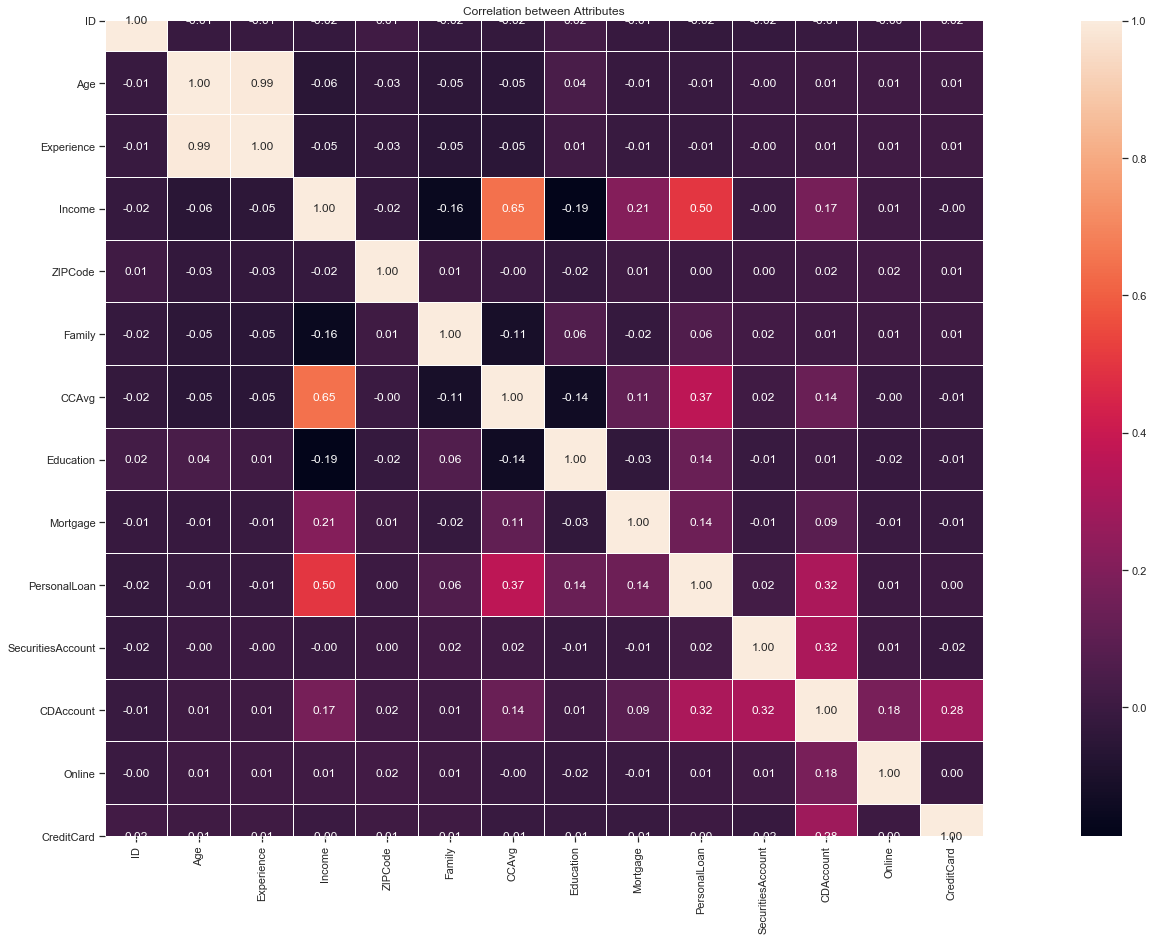

In [121]:
from matplotlib import *
import sys
from pylab import *

plt.figure(figsize=(35,15))
ax = sns.heatmap(ds.corr(), vmax=1, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation between Attributes')
plt.show()



#### Observation
1. Age and Experoence is highly corelated
2. Income and CCAvg also corelated

In [122]:
#Checking the distibution of Personal Loan


ds["PersonalLoan"].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

## Splitting Data to Train And Test

In [123]:
ds1=ds
ds1.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [124]:
#Dropping "ID", "Experience" and "ZIPCode" columns
#ID and ZIPCode are just numbers od series & Experience is highly correlated with Age

ds1.drop(['Experience' ,'ID' ,'CCAvg'], axis=1, inplace=True)
X1=ds1.drop("PersonalLoan",axis=1)                      #Set of independent variables
y1=ds1["PersonalLoan"]                                  #Set of dependent variable
X_Train, X_Test, y_Train, y_Test=train_test_split(X1, y1, test_size=0.30, random_state=53)  # Splitting of the data
#train_set, test_set = train_test_split(ds.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [125]:
# Verifying the split of the data

print("{}% data is in training set".format((len(X_Train)/len(ds1)) * 100))
print("{}% data is in test set".format((len(X_Test)/len(ds1)) * 100))

70.0% data is in training set
30.0% data is in test set


### Model Building: Logistic Regression

In [126]:
#Fitting the the model into training dataset
LogReg_model=LogisticRegression(solver="liblinear")
LogReg_model.fit(X_Train,y_Train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_predict=LogReg_model.predict(X_Test)
print(confusion_matrix(y_Test, y_predict))

[[1313   39]
 [  94   54]]


In [128]:
print(classification_report(y_Test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1352
           1       0.58      0.36      0.45       148

    accuracy                           0.91      1500
   macro avg       0.76      0.67      0.70      1500
weighted avg       0.90      0.91      0.90      1500



In [129]:
print(accuracy_score(y_Test, y_predict))

0.9113333333333333


#### Model Evaluation Criteria:
Here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix.
Accuracy is 91% but we know from data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.

### Naive Bayes

In [130]:
naive_model = GaussianNB()
naive_model.fit(X_Train, y_Train)

prediction = naive_model.predict(X_Test)
naive_model.score(X_Test, y_Test)

0.9166666666666666

In [131]:
cm = pd.DataFrame(confusion_matrix(y_Test, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


In [132]:
print(classification_report(y_Test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1352
           1       0.59      0.53      0.56       148

    accuracy                           0.92      1500
   macro avg       0.77      0.75      0.76      1500
weighted avg       0.91      0.92      0.91      1500



In [133]:
print(accuracy_score(y_Test, prediction))

0.9166666666666666


#### Model Evaluation Criteria:
Here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix.
Accuracy is upper side of 91% but we know from data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.

We got an accuracy score of around 91% with a recall value of 53% which is higher as compared to the Logistic Regression.

### KNeighborsClassifier

In [392]:
#train_set_indep.shape

In [134]:
knn = KNeighborsClassifier(n_neighbors= 21, weights = 'uniform', metric='euclidean')
knn.fit(X_Train, y_Train)    
predicted = knn.predict(X_Test)
acc = accuracy_score(y_Test, predicted)

In [135]:
print(acc)

0.8993333333333333


In [136]:
print(confusion_matrix(y_Test, predicted))

[[1342   10]
 [ 141    7]]


In [137]:
print(classification_report(y_Test, predicted))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      1352
           1       0.41      0.05      0.08       148

    accuracy                           0.90      1500
   macro avg       0.66      0.52      0.52      1500
weighted avg       0.86      0.90      0.86      1500



#### Model Evaluation Criteria:
Here we are with a classification report which consists of a precision, recall, f1-score & support, Also the accuracy_score and a 2*2 confusion matrix.
Accuracy is upper side of 89% but we know from data that the number of buyer’s percentage to the non-buyer percentage is very less. Hence accuracy didn’t play a big role in determining how our model performed.

We got an accuracy score of around 89% with a recall value of 5% which is much less as compared to the Logistic Regression and Naive Bayes.

### Insight
If we compare the results of above model, it seems that for this dataset, all 3 models are produced the almost same result. But if we choose one model than "Naive Bayes" has been the more accurate then others.